In [1]:
%run -i read_counts.py

pickle.dump(all_counts, open('all_counts.pkl', 'wb'))
pickle.dump(all_freqs, open('all_freqs.pkl', 'wb'))

False
None
./ALL_SAMPLES/
['./ALL_SAMPLES//dvh-output/Sample_ISB-1'
 './ALL_SAMPLES//dvh-output/Sample_ISB-10'
 './ALL_SAMPLES//dvh-output/Sample_ISB-11'
 './ALL_SAMPLES//dvh-output/Sample_ISB-12'
 './ALL_SAMPLES//dvh-output/Sample_ISB-13'
 './ALL_SAMPLES//dvh-output/Sample_ISB-14'
 './ALL_SAMPLES//dvh-output/Sample_ISB-15'
 './ALL_SAMPLES//dvh-output/Sample_ISB-16'
 './ALL_SAMPLES//dvh-output/Sample_ISB-17'
 './ALL_SAMPLES//dvh-output/Sample_ISB-18'
 './ALL_SAMPLES//dvh-output/Sample_ISB-19'
 './ALL_SAMPLES//dvh-output/Sample_ISB-2'
 './ALL_SAMPLES//dvh-output/Sample_ISB-20'
 './ALL_SAMPLES//dvh-output/Sample_ISB-21'
 './ALL_SAMPLES//dvh-output/Sample_ISB-22'
 './ALL_SAMPLES//dvh-output/Sample_ISB-23'
 './ALL_SAMPLES//dvh-output/Sample_ISB-24'
 './ALL_SAMPLES//dvh-output/Sample_ISB-3'
 './ALL_SAMPLES//dvh-output/Sample_ISB-4'
 './ALL_SAMPLES//dvh-output/Sample_ISB-5'
 './ALL_SAMPLES//dvh-output/Sample_ISB-6'
 './ALL_SAMPLES//dvh-output/Sample_ISB-7'
 './ALL_SAMPLES//dvh-output/Sample_

TypeError: exceptions must be old-style classes or derived from BaseException, not str

In [2]:
from matplotlib import pyplot as plt

%matplotlib inline
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('pdf', 'svg')

import pandas as pd
pd.options.display.mpl_style = 'default'

from mpltools import style
from mpltools import layout

style.use('ggplot')

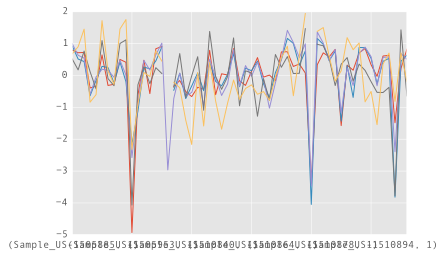

In [3]:
x = all_freqs['Desulfovibrio_vulgaris_Hildenborough_uid57645'].copy()
x[ x == 0 ] = np.NAN
x = np.log10( x )
x = (x.transpose() - x.mean(1)).transpose()
x = (x.transpose() / x.std(1)).transpose()
op = x.ix[ ['DVU0002','DVU0003','DVU0004','DVU0005','DVU0018'] ] 
op.transpose().plot(kind='line', legend=False)

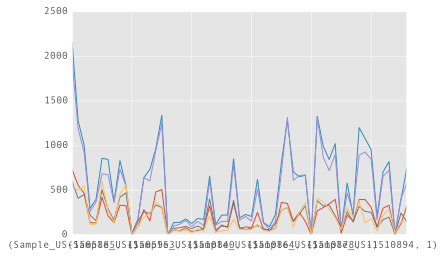

In [4]:
xx = all_counts['Desulfovibrio_vulgaris_Hildenborough_uid57645'].copy()
op = xx.ix[ ['DVU0002','DVU0003','DVU0004','DVU0005','DVU0018'] ] 
op.transpose().plot(kind='line', legend=False)

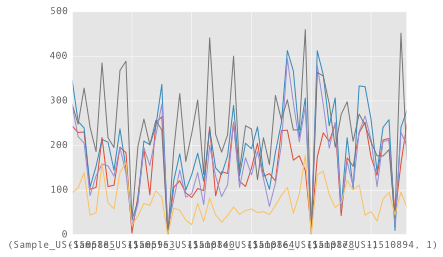

In [5]:
xxx = all_freqs['Desulfovibrio_vulgaris_Hildenborough_uid57645'].copy()
op = xxx.ix[ ['DVU0002','DVU0003','DVU0004','DVU0005','DVU0018'] ] 
op.transpose().plot(kind='line', legend=False)

In [6]:
## samples where values are dropping way low:
samps = op.columns.droplevel(1).values[np.where((op < 1.5).sum()>0)]
sample_infos['Desulfovibrio_vulgaris_Hildenborough_uid57645'].ix[ samps ] ## all starvation...

,Sample name,Source,Barcode,Strain/condition,cultivation type,Chemostat/batch ID #,Description/condition details,Description/condition details -2,carbon source,electron donor,concentration (mM),electron acceptor,growth rate per h,T0C,organisms
Sample name,,,,,,,,,,,,,,,
Sample_US-1506005,Sample_US-1506005,Labcorp,US-1506005,H2Sulfate 37C,batch,NaN,"hydrogen, sulfate 15 mM 37C",starvation,none,hydrogen,NaN,none,0,37,D vulgaris Hildenborugh
Sample_US-1510878,Sample_US-1510878,Labcorp,US-1510878,H2 37 - e. stat 1,batch,NaN,"hydrogen, sulfate 15 mM 37C",starvation,none,hydrogen,NaN,none,0,37,D vulgaris Hildenborugh


In [7]:
x = all_freqs['Desulfovibrio_vulgaris_Hildenborough_uid57645'].copy()
x[ x == 0 ] = np.NAN
x = np.log10( x )
x = (x.transpose() - x.mean(1)).transpose()
x = (x.transpose() / x.std(1)).transpose()

from sklearn.cluster import KMeans
#inertias = np.zeros(400)
#for n_clust in range(50,400):
n_clust = 800
km = KMeans(init='k-means++', n_clusters=n_clust, n_init=200, n_jobs=6)
## k-means cant handle nans so replace with zeros
km.fit( x.fillna( 0 ).values )
#inertias[n_clust] = km.inertia_
#print n_clust, km.inertia_
#pd.Series(inertias).plot()

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=800,
    n_init=200, n_jobs=6, precompute_distances='auto', random_state=None,
    tol=0.0001, verbose=0)

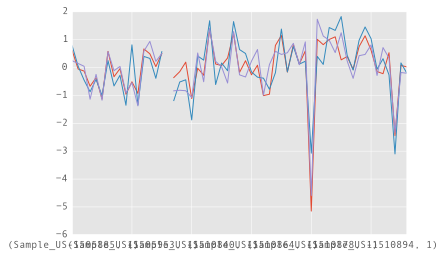

In [8]:
op = x.ix[ km.labels_ == 3 ]
op.transpose().plot(kind='line', legend=False)

In [9]:
op.index.values

array(['DVU0855', 'DVU0856', 'DVU0865'], dtype=object)

In [10]:
inds = np.where(np.in1d(x.index.values, ['DVU0002','DVU0003','DVU0004','DVU0005','DVU0018']))
km.labels_[inds]

array([617,  79, 630, 293, 268], dtype=int32)

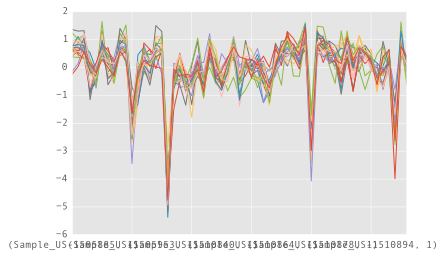

In [11]:
op = x.ix[ km.labels_ == 53 ]
op.transpose().plot(kind='line', legend=False)

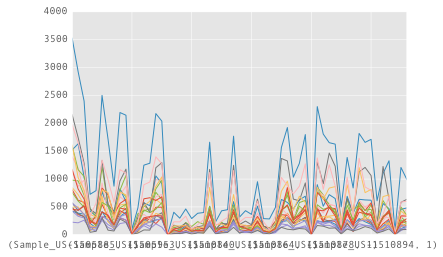

In [12]:
op = xx.ix[ km.labels_ == 53 ]    ## raw counts
op.transpose().plot(kind='line', legend=False)

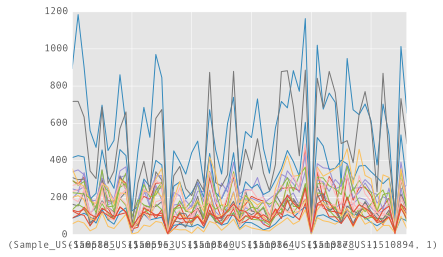

In [13]:
op = xxx.ix[ km.labels_ == 53 ]    ## raw frequencies
op.transpose().plot(kind='line', legend=False)

In [14]:
from sklearn.decomposition import PCA

x = all_freqs['Desulfovibrio_vulgaris_Hildenborough_uid57645'].copy()
x[ x == 0 ] = np.NAN
x = np.log10( x )
x = (x.transpose() - x.mean(1)).transpose()
x = (x.transpose() / x.std(1)).transpose()
x = x.fillna(0)
x = x.transpose().as_matrix()
print x.shape

pca = PCA(n_components=4)
pca.fit(x)

x = all_freqs['Desulfovibrio_vulgaris_Hildenborough_uid57645'].copy()
x[ x == 0 ] = np.NAN
x = np.log10( x )
x = x.fillna(0)
x = x.transpose().as_matrix()
pc = pca.transform(x)

print pca.explained_variance_ratio_

print pca.score(x)
#print pca.score_samples(x)

(57, 3648)
[ 0.31806698  0.09561863  0.07410409  0.04972534]
-9543.29885446


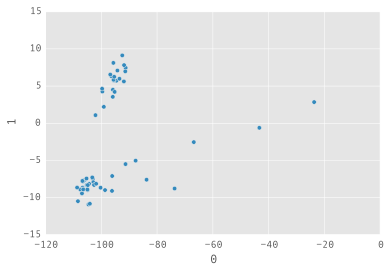

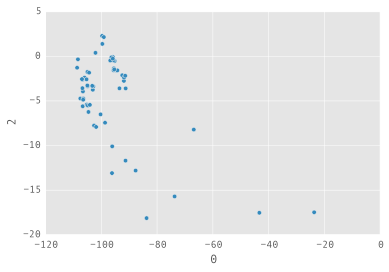

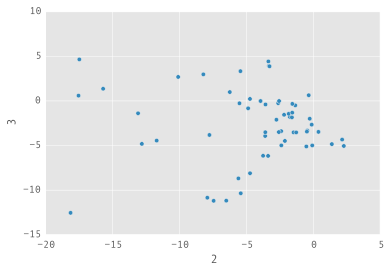

In [15]:
pc = pd.DataFrame(pc)
pc.shape
pc.plot(x=0, y=1, kind='scatter')
pc.plot(x=0, y=2, kind='scatter')
pc.plot(x=2, y=3, kind='scatter')

In [16]:
pc = pca.transform(x)
pc = pd.DataFrame(pc)
pc.index = all_freqs['Desulfovibrio_vulgaris_Hildenborough_uid57645'].copy().columns.levels[0].values
pc.head()

,0,1,2,3
Sample_US-1505885,-105.982790,-7.640403,-2.395219,-3.387501
Sample_US-1505888,-104.971727,-8.404548,-1.752779,-1.794952
Sample_US-1505895,-103.019983,-7.476939,-3.748899,-6.141853
Sample_US-1505897,-91.299891,-5.488739,-11.692732,-4.444286
Sample_US-1505898,-95.823911,4.509561,-0.081352,-4.984723


In [17]:
sample_info = pd.read_excel('Sample_Info_COMPLETE.xlsx') ##,skiprows=[0])
sample_info = sample_info.set_index( sample_info['Sample name'] )
sample_infos = { k:sample_info.ix[all_freqs[k].columns.droplevel(1).values] for k in all_freqs.keys() }
info = sample_infos['Desulfovibrio_vulgaris_Hildenborough_uid57645'].copy()
info.head(3)
np.unique(info['carbon source'])

array([u'acetate 10mM', u'lactate 10mM', u'lactate 30mM', u'lactate 40mM',
       u'none', u'pyruvate 20mM', u'pyruvate 80mM'], dtype=object)

In [18]:
gr = info['growth rate per h']
gr = gr.fillna(0.1)
gr[ gr == 'log' ] = 0.1

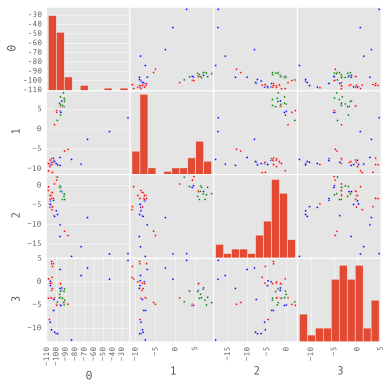

In [19]:
colors = np.repeat('k', len(gr))
colors[ np.where(gr == 0.1) ] = 'r'
colors[ np.where(gr < 0.1) ] = 'g'
colors[ np.where(gr == 0.0) ] = 'b'
pc = pd.DataFrame(pc).copy()
from pandas.tools.plotting import scatter_matrix
#pc.plot(x=0, y=1, kind='scatter', c=colors)
#pc.plot(x=0, y=2, kind='scatter', c=colors)
#pc.plot(x=1, y=3, kind='scatter', c=colors)
## can use 'kde' instead:
scatter_matrix(pc, alpha=1, figsize=(6, 6), diagonal='hist', c=colors);

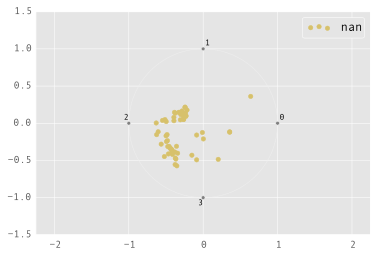

In [20]:
cs2 = np.repeat('high', len(gr))
cs2[ np.where(gr == 0.1) ] = 'med'
cs2[ np.where(gr < 0.1) ] = 'low'
cs2[ np.where(gr == 0.0) ] = 'zero'
pc2 = pc.copy()
pc2['growth rate'] = pd.Series(cs2)
from pandas.tools.plotting import radviz
plt.figure()
radviz(pc2, 'growth rate');

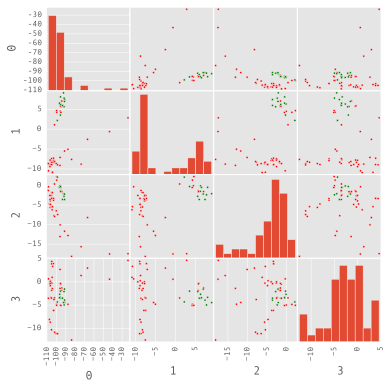

In [21]:
ct = info['cultivation type']
colors = np.where(ct == 'batch', 'r', 'g')
pc = pd.DataFrame(pc).copy()
#pc.plot(x=0, y=1, kind='scatter', c=colors)
#pc.plot(x=0, y=2, kind='scatter', c=colors)
#pc.plot(x=2, y=3, kind='scatter', c=colors)
scatter_matrix(pc, alpha=1, figsize=(6, 6), diagonal='hist', c=colors);

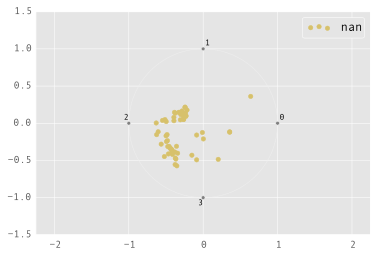

In [22]:
ct = info['cultivation type']
cs2 = np.where(ct == 'batch', 'batch', 'chemo')
pc2 = pc.copy()
pc2['cultivation type'] = pd.Series(cs2)
from pandas.tools.plotting import radviz
plt.figure()
radviz(pc2, 'cultivation type');

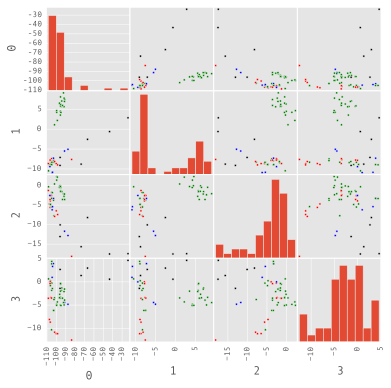

In [23]:
cs = info['carbon source']
cs2 = np.repeat('k', len(cs))
cs2[ np.where(np.logical_or(cs == 'pyruvate 80mM', cs == 'pyruvate 20mM')) ] = 'r'
cs2[ np.where(np.logical_or(np.logical_or(cs == 'lactate 40mM', cs == 'lactate 30mM'), cs == 'lactate 10mM')) ] = 'g'
cs2[ np.where(np.logical_or(cs == 'acetate 10mM', cs == 'acetate10mM')) ] = 'b'
pc = pd.DataFrame(pc).copy()
#pc.plot(x=0, y=1, kind='scatter', c=colors)
#pc.plot(x=0, y=2, kind='scatter', c=colors)
#pc.plot(x=2, y=3, kind='scatter', c=colors)
scatter_matrix(pc, alpha=1, figsize=(6, 6), diagonal='hist', c=cs2);

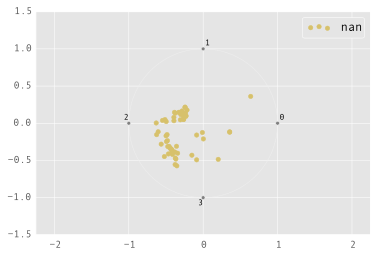

In [24]:
cs = info['carbon source']
cs2 = np.repeat('none', len(cs))
cs2[ np.where(np.logical_or(cs == 'pyruvate 80mM', cs == 'pyruvate 20mM')) ] = 'pyruvate'
cs2[ np.where(np.logical_or(np.logical_or(cs == 'lactate 40mM', cs == 'lactate 30mM'), cs == 'lactate 10mM')) ] = 'lactate'
cs2[ np.where(np.logical_or(cs == 'acetate 10mM', cs == 'acetate10mM')) ] = 'acetate'
pc2 = pc.copy()
pc2['carbon source'] = pd.Series(cs2)
from pandas.tools.plotting import radviz
plt.figure()
radviz(pc2, 'carbon source');

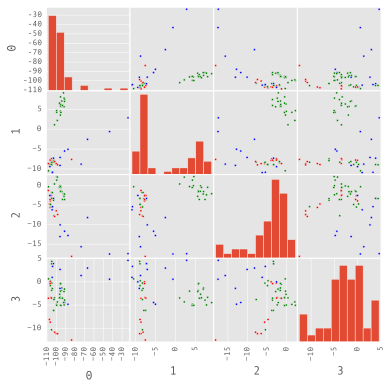

In [25]:
ed = info['electron donor']
cs2 = np.repeat('k', len(ed))
cs2[ np.where(ed == 'pyruvate') ] = 'r'
cs2[ np.where(ed == 'lactate') ] = 'g'
cs2[ np.where(ed == 'hydrogen') ] = 'b'
pc = pd.DataFrame(pc).copy()
#pc.plot(x=0, y=1, kind='scatter', c=colors)
#pc.plot(x=0, y=2, kind='scatter', c=colors)
#pc.plot(x=2, y=3, kind='scatter', c=colors)
scatter_matrix(pc, alpha=1, figsize=(6, 6), diagonal='hist', c=cs2);

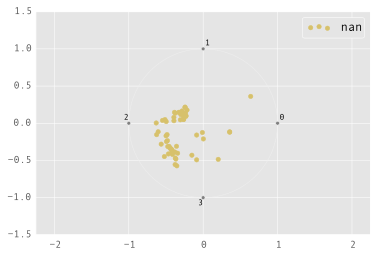

In [26]:
pc2 = pc.copy()
pc2['electron donor'] = pd.Series(sample_info['electron donor'].values)
pc2.head()
from pandas.tools.plotting import radviz
plt.figure()
radviz(pc2, 'electron donor');

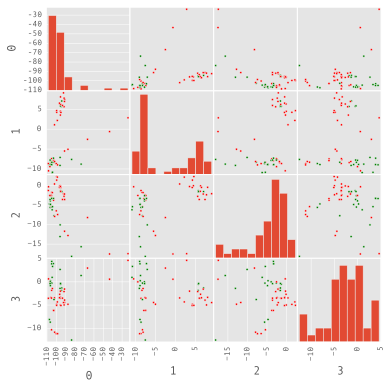

In [27]:
temp = info['T0C']
colors = np.where(temp == 37, 'r', 'g')
pc = pd.DataFrame(pc).copy()
#pc.plot(x=0, y=1, kind='scatter', c=colors)
#pc.plot(x=0, y=2, kind='scatter', c=colors)
#pc.plot(x=2, y=3, kind='scatter', c=colors)
scatter_matrix(pc, alpha=1, figsize=(6, 6), diagonal='hist', c=colors);

KeyError: nan

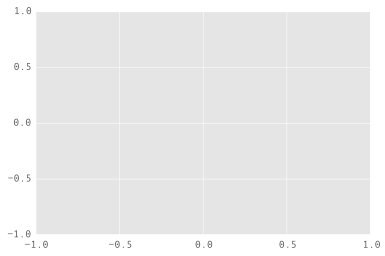

In [28]:
pc2 = pc.copy()
pc2['T0C'] = pd.Series(sample_info.T0C.values)
pc2.head()
from pandas.tools.plotting import radviz
plt.figure()
radviz(pc2, 'T0C');